# **Name-Vikash Kumar Maheshwari**
# **Car  Price Prediction Using ML**
# **Oasis Infobyte**

In [169]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [170]:
df = pd.read_csv('carprice.csv')


In [173]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [174]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [175]:
df.shape

(205, 26)

In [176]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [177]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [178]:
df.replace({'fueltype':{'petrol':0,'diesel':1,'gas':2}},inplace=True)


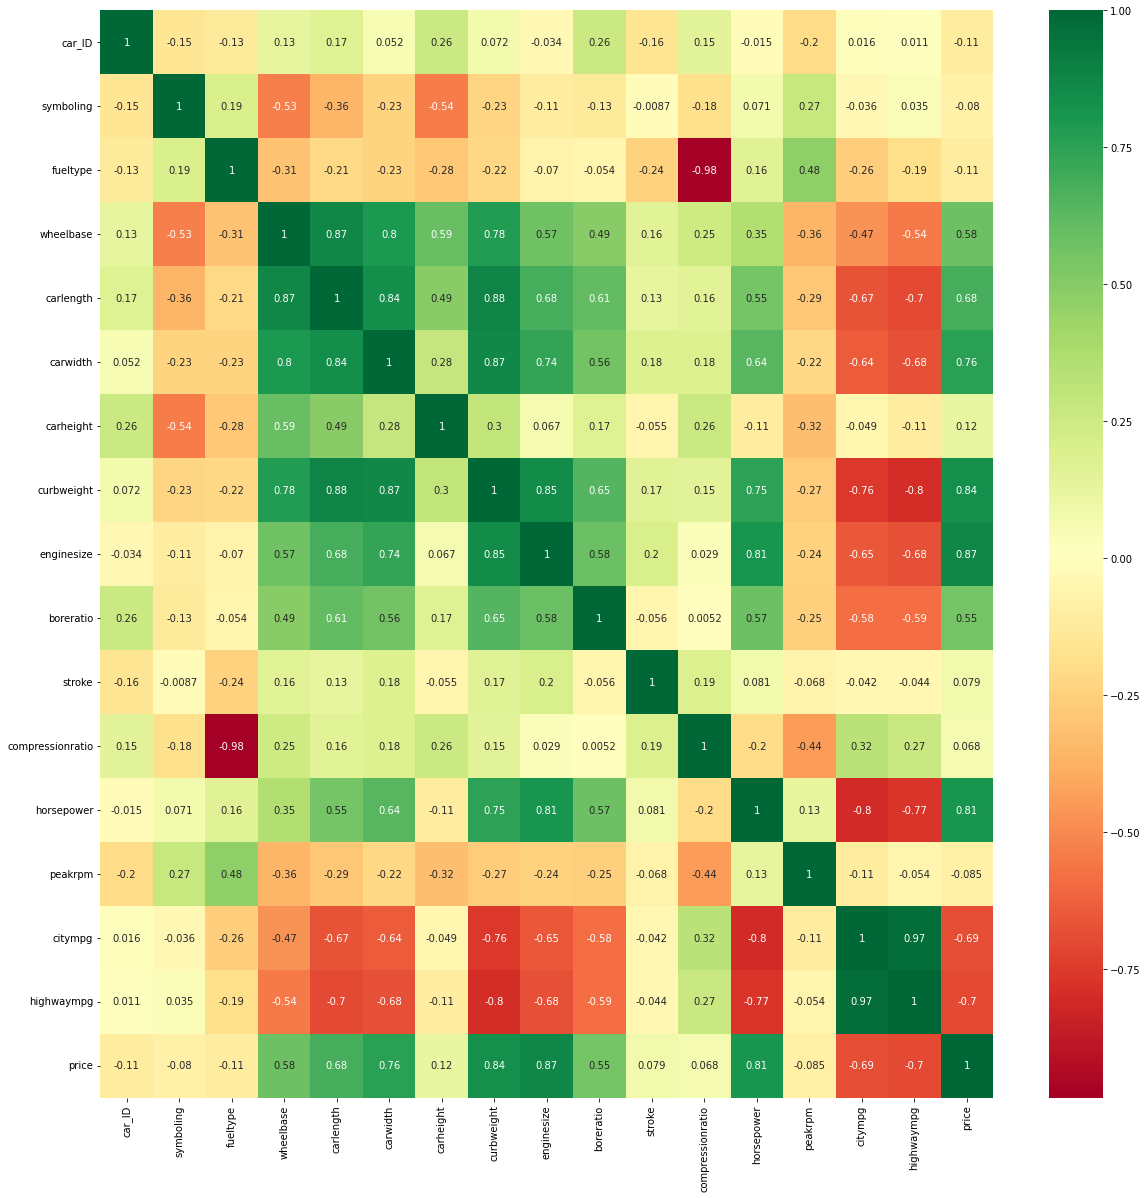

In [179]:
corrmat = df.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map of the corerlation of the features
g=sns.heatmap(df[top_corr_features].corr(method='pearson'),annot=True,cmap="RdYlGn")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

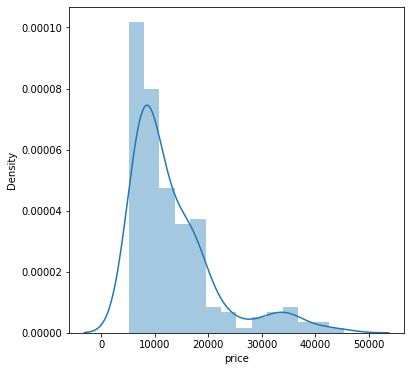

In [180]:
plt.figure(figsize=(6,6))
sns.distplot(df["price"], hist=True)


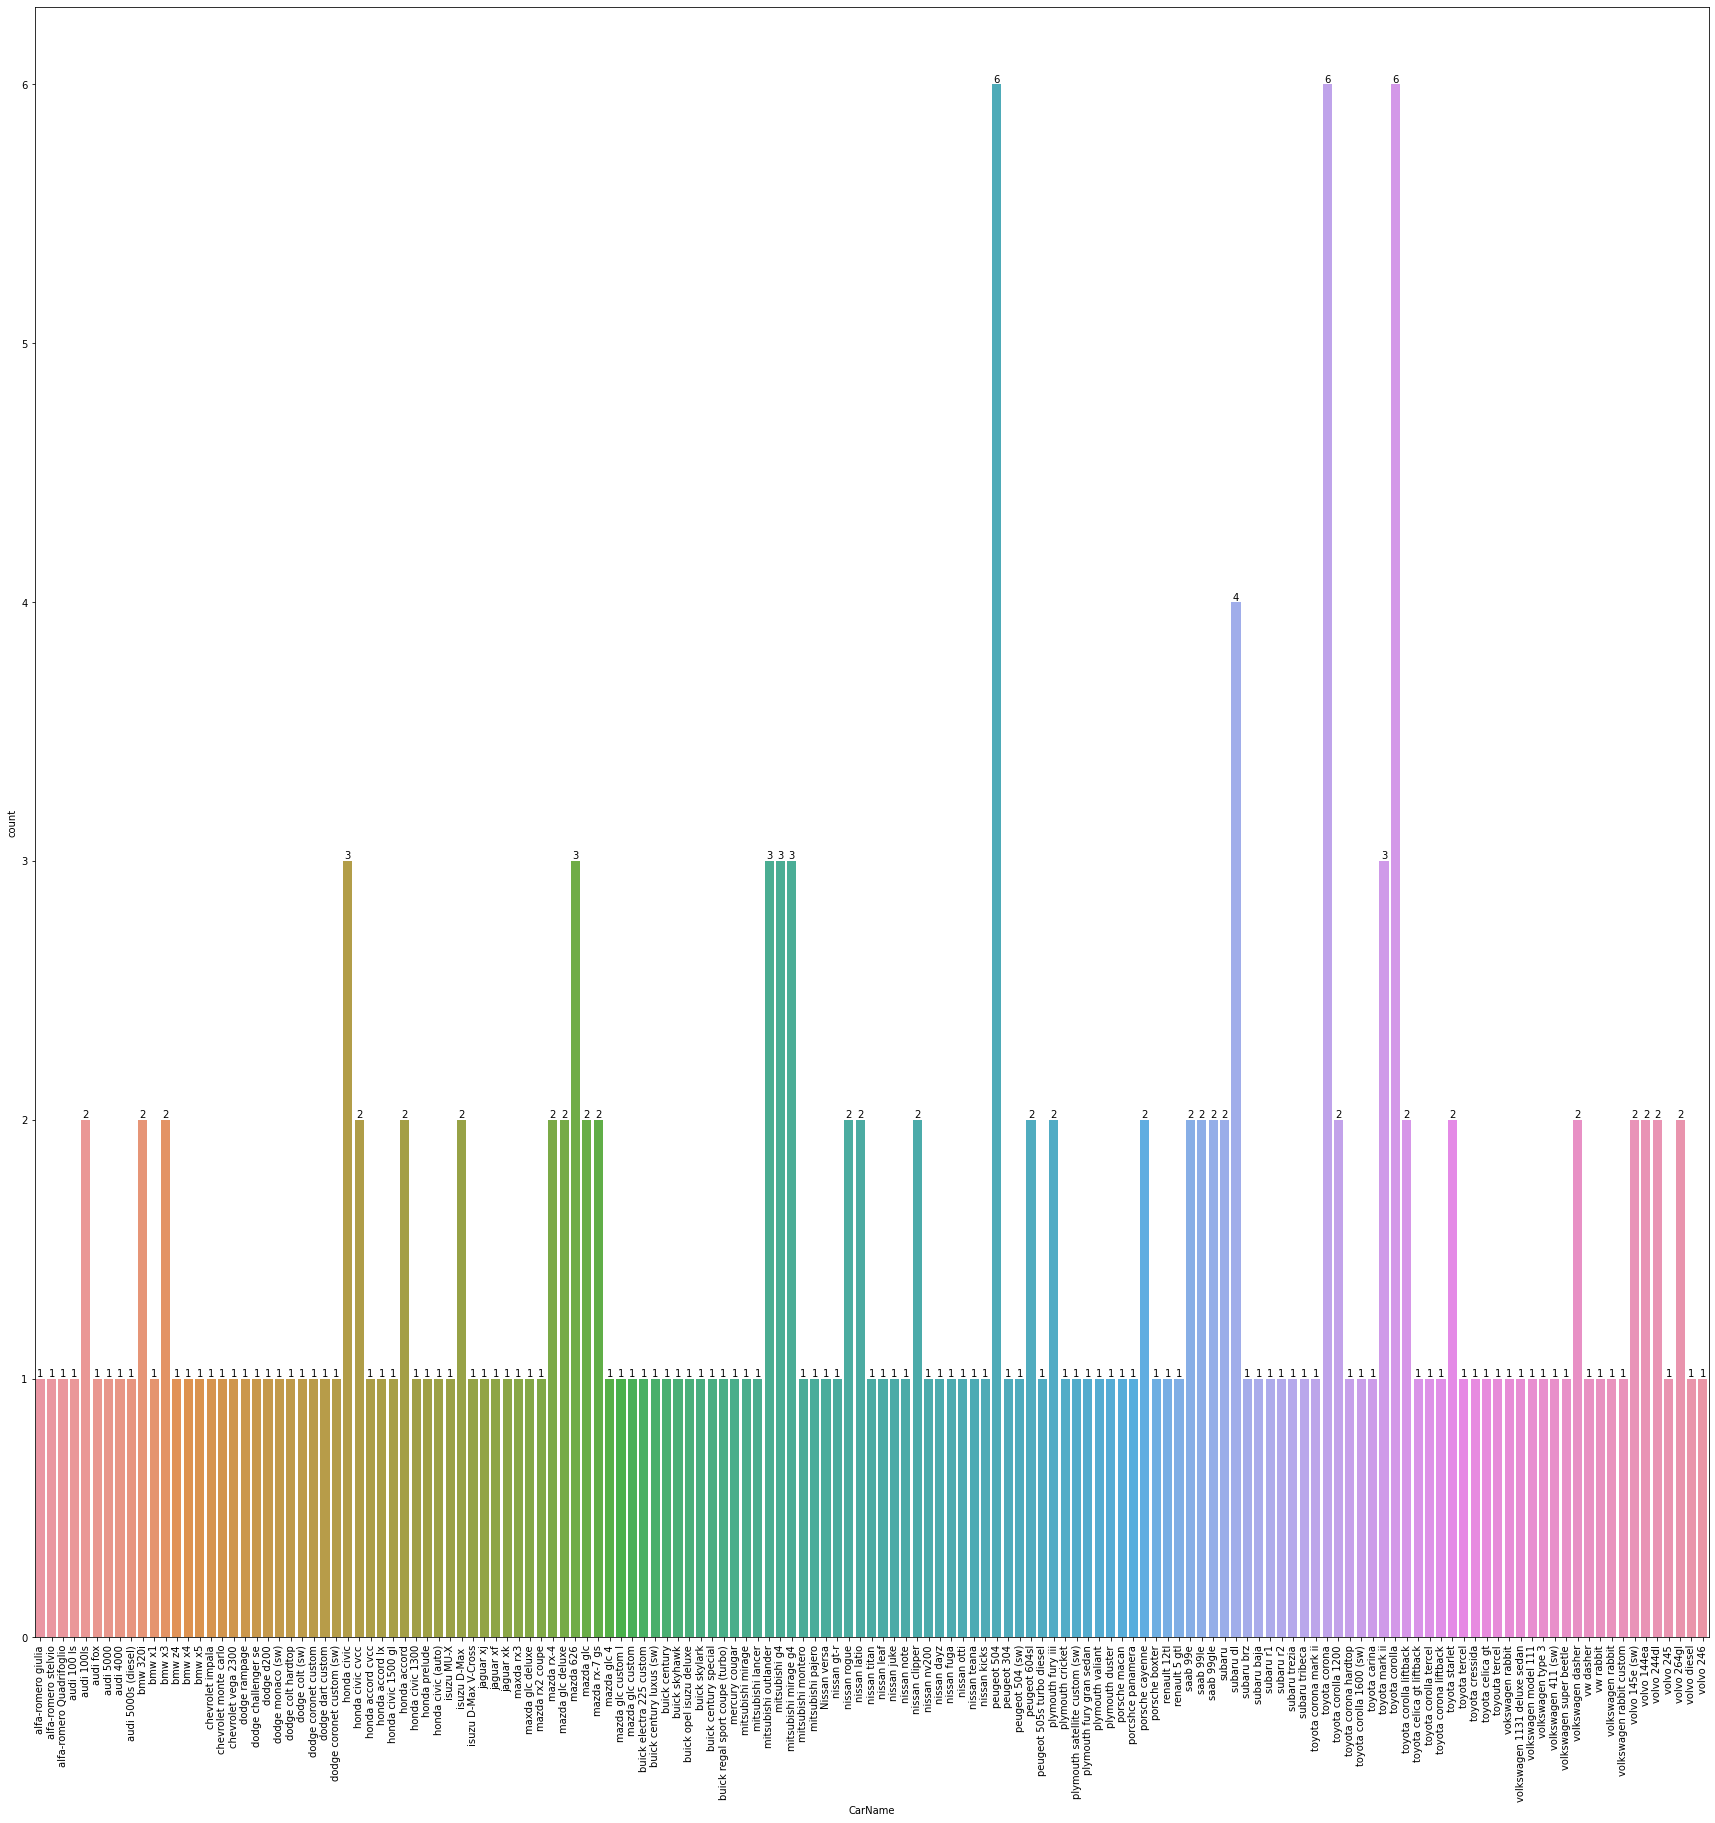

In [182]:
plt.figure(figsize=(30,30))
ax=sns.countplot(x=df["CarName"]);
ax.bar_label(ax.containers[0]);
plt.xticks(rotation=90);

In [186]:
data=df[df['price']<6e6].reset_index(drop=True)
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,2,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,2,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,2,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,2,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,2,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),2,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,2,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,2,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,1,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [187]:
x=data.drop(['aspiration','doornumber','carbody' ,'drivewheel','cylindernumber' ,'enginelocation' ,'fuelsystem' ,'enginetype','price'],axis=1)
y=data['price']

In [188]:
print(x)


     car_ID  symboling                   CarName  fueltype  wheelbase  \
0         1          3        alfa-romero giulia         2       88.6   
1         2          3       alfa-romero stelvio         2       88.6   
2         3          1  alfa-romero Quadrifoglio         2       94.5   
3         4          2               audi 100 ls         2       99.8   
4         5          2                audi 100ls         2       99.4   
..      ...        ...                       ...       ...        ...   
200     201         -1           volvo 145e (sw)         2      109.1   
201     202         -1               volvo 144ea         2      109.1   
202     203         -1               volvo 244dl         2      109.1   
203     204         -1                 volvo 246         1      109.1   
204     205         -1               volvo 264gl         2      109.1   

     carlength  carwidth  carheight  curbweight  enginesize  boreratio  \
0        168.8      64.1       48.8        2548  

In [189]:
print(y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


In [190]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [191]:
x_train.head()


,car_ID,symboling,CarName,fueltype,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
83,84,3,mitsubishi g4,2,95.9,173.2,66.3,50.2,2921,156,3.59,3.86,7.0,145,5000,19,24
31,32,2,honda civic cvcc,2,86.6,144.6,63.9,50.8,1819,92,2.91,3.41,9.2,76,6000,31,38
70,71,-1,buick skyhawk,1,115.6,202.6,71.7,56.3,3770,183,3.58,3.64,21.5,123,4350,22,25
62,63,0,mazda rx-4,2,98.8,177.8,66.5,55.5,2410,122,3.39,3.39,8.6,84,4800,26,32
1,2,3,alfa-romero stelvio,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27


In [193]:
import math
from sklearn.pipeline import make_pipeline

In [194]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [195]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
oh=OneHotEncoder()
oh.fit(x[['CarName','fueltype']]) 


OneHotEncoder()

In [196]:
from sklearn.compose import make_column_transformer
column_trans= make_column_transformer((OneHotEncoder(categories=oh.categories_),['CarName','fueltype']),
                                     remainder='passthrough')

In [197]:
import math
from sklearn.pipeline import make_pipeline

In [210]:
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred_lr=pipe.predict(x_test)
r2=r2_score(y_test,y_pred_lr)
r2

0.6341951649592161